#Phase -1 : Download, load data into python notebook (jupyter), EDA, Checks:  

*   Is there any missing data
*   Which columns are numeric. 
*   Which columns are categorical. 
*   Output: Binary classification / multi-class?  
*   Are there columns with zero or near-zero variance.  
*   Are labels/class unbalanced or balanced. 



In [0]:
import pandas as pd
from google.colab import drive

link = 'https://drive.google.com/open?id=1zewb-_q-ts7ErV31dKJk1l9Ac8jS5dMb'
#refer to: https://towardsdatascience.com/3-ways-to-load-csv-files-into-colab-7c14fcbdcb92
drive.mount('/content/drive/')

data = pd.read_csv('/content/drive/My Drive/Springboard - Data Science Career Track/Capstone Project/Bank Marketing/data/bank-additional-full.csv', delimiter=";")
print(data.info())

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  obj

In [0]:
print(pd.options.display.max_columns)
pd.options.display.max_columns = 30 #https://pandas.pydata.org/pandas-docs/stable/user_guide/options.html  #https://stackoverflow.com/questions/42327312/printing-all-contents-without-ellipsis
print(data.head(15))

30
    age          job   marital            education  default housing loan  \
0    56    housemaid   married             basic.4y       no      no   no   
1    57     services   married          high.school  unknown      no   no   
2    37     services   married          high.school       no     yes   no   
3    40       admin.   married             basic.6y       no      no   no   
4    56     services   married          high.school       no      no  yes   
5    45     services   married             basic.9y  unknown      no   no   
6    59       admin.   married  professional.course       no      no   no   
7    41  blue-collar   married              unknown  unknown      no   no   
8    24   technician    single  professional.course       no     yes   no   
9    25     services    single          high.school       no     yes   no   
10   41  blue-collar   married              unknown  unknown      no   no   
11   25     services    single          high.school       no     yes   no

*   Is there any missing data.  
It seems no, there is no missing data.

*   Which columns are numeric. 
<pre>
The following columns are numerical:  
 0   age             41188 non-null  int64  
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null  float64
 18  euribor3m       41188 non-null  float64
 19  nr.employed     41188 non-null  float64
</pre>

*   Which columns are categorical. 
<pre>
The following columns are categorical:  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 14  poutcome        41188 non-null  object 
 20  y               41188 non-null  object
</pre>

*   Output: Binary classification / multi-class?  
Binary classification


In [0]:

#*   Are there columns with zero or near-zero variance. 
print(data.var(axis=0))


age                 108.602451
duration          67225.728877
campaign              7.672975
pdays             34935.687284
previous              0.244927
emp.var.rate          2.467915
cons.price.idx        0.335056
cons.conf.idx        21.420215
euribor3m             3.008308
nr.employed        5220.283250
dtype: float64


*   Are there columns with zero or near-zero variance.  
It seems the columns: previous and cons.price.idx are two near-zero variance columns

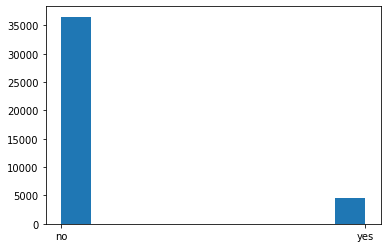

In [0]:
#*   Are labels/class unbalanced or balanced.
import matplotlib.pyplot as plt
plt.hist(data['y'])
plt.show()


*   Are labels/class unbalanced or balanced.  
No, it is unbalanced.



#Phase-2: Preprocessing


*   Only for numerical cols: apply centering and scaling(normalization) operations. 
https://scikit-learn.org/stable/modules/preprocessing.html#standardization-or-mean-removal-and-variance-scaling

*   Only for categorical cols: Apply one-hot encoding (also called dummy coding). 
https://scikit-learn.org/stable/modules/preprocessing.html#encoding-categorical-features 

*   Are there columns with zero- if so , just drop those columns
 or near-zero variance-examine if it is abnormal or useless variable depending on your project situation-drop or don't drop accordingly

*   Are labels/class unbalanced or balanced
Get counts (and proportions) of each unique label type
If imbalanced-apply SMOTE sampling to generate synthetic data to append to original dataset-such that the newer dataset is more balanced. 
https://imbalanced-learn.readthedocs.io/en/stable/generated/imblearn.over_sampling.SMOTE.html





In [0]:
from sklearn import preprocessing
#Apply centering and scaling
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numeric_df = data.select_dtypes(include=numerics)

numeric_df_scaled = preprocessing.scale(numeric_df, axis=0)

print(numeric_df_scaled)

[[ 1.53303429  0.01047142 -0.56592197 ...  0.88644656  0.71245988
   0.33167991]
 [ 1.62899323 -0.42150051 -0.56592197 ...  0.88644656  0.71245988
   0.33167991]
 [-0.29018564 -0.12451981 -0.56592197 ...  0.88644656  0.71245988
   0.33167991]
 ...
 [ 1.53303429 -0.26722482 -0.20490853 ... -2.22495344 -1.49518647
  -2.8156966 ]
 [ 0.38152696  0.70856893 -0.56592197 ... -2.22495344 -1.49518647
  -2.8156966 ]
 [ 3.26029527 -0.07438021  0.15610492 ... -2.22495344 -1.49518647
  -2.8156966 ]]


In [0]:

#Apply One-Hot Coding:
job = [ 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown']
marital = ['divorced','married','single','unknown']
education = ['basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown']
default = ['no','yes','unknown']
housing = ['no','yes','unknown']
loan = ['no','yes','unknown']
contact = ['cellular','telephone']
#print(data.loc[:, 'month'].value_counts().index)
'''
month = list(data.loc[:, 'month'].value_counts().index)
print(month)

#Only 10 month
Output: ['may', 'jul', 'aug', 'jun', 'nov', 'apr', 'oct', 'sep', 'mar', 'dec']
'''
#Question: do I need to add all 12 months?
month = ['mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
day_of_week = ['mon','tue','wed','thu','fri']
poutcome = ['failure','nonexistent','success']

enc = preprocessing.OneHotEncoder(categories=[job, marital, education, default, housing, loan, contact, month, day_of_week, poutcome])
categorical_df = data.select_dtypes(exclude=numerics)
del categorical_df['y']
print(categorical_df)

#curious about whether the job: 'admin.' should have a extra dot
job = list(data.loc[:, 'job'].value_counts().index)
print(job)


               job  marital            education  default housing loan  \
0        housemaid  married             basic.4y       no      no   no   
1         services  married          high.school  unknown      no   no   
2         services  married          high.school       no     yes   no   
3           admin.  married             basic.6y       no      no   no   
4         services  married          high.school       no      no  yes   
...            ...      ...                  ...      ...     ...  ...   
41183      retired  married  professional.course       no     yes   no   
41184  blue-collar  married  professional.course       no      no   no   
41185      retired  married    university.degree       no     yes   no   
41186   technician  married  professional.course       no      no   no   
41187      retired  married  professional.course       no     yes   no   

         contact month day_of_week     poutcome  
0      telephone   may         mon  nonexistent  
1      tele

In [0]:
results = enc.fit(categorical_df)
print(results)
encoded = enc.transform(categorical_df)
print(encoded)

OneHotEncoder(categories=[['admin.', 'blue-collar', 'entrepreneur', 'housemaid',
                           'management', 'retired', 'self-employed', 'services',
                           'student', 'technician', 'unemployed', 'unknown'],
                          ['divorced', 'married', 'single', 'unknown'],
                          ['basic.4y', 'basic.6y', 'basic.9y', 'high.school',
                           'illiterate', 'professional.course',
                           'university.degree', 'unknown'],
                          ['no', 'yes', 'unknown'], ['no', 'yes', 'unknown'],
                          ['no', 'yes', 'unknown'], ['cellular', 'telephone'],
                          ['mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep',
                           'oct', 'nov', 'dec'],
                          ['mon', 'tue', 'wed', 'thu', 'fri'],
                          ['failure', 'nonexistent', 'success']],
              drop=None, dtype=<class 'numpy.float64'>, handle_unknown='err

In [0]:
#Are there columns with zero- if so , just drop those columns or near-zero variance-examine 
#if it is abnormal or useless variable depending on your project situation-drop or don't drop accordingly

'''
0   age             41188 non-null  int64  
10  duration        41188 non-null  int64  
11  campaign        41188 non-null  int64  
12  pdays           41188 non-null  int64  
13  previous        41188 non-null  int64  
15  emp.var.rate    41188 non-null  float64
16  cons.price.idx  41188 non-null  float64
17  cons.conf.idx   41188 non-null  float64
18  euribor3m       41188 non-null  float64
19  nr.employed     41188 non-null  float64
'''
print(data.age[data.age == 0].count())
print(data.duration[data.duration == 0].count())
print('previous')
print(data.previous[data.previous == 0].count()) # This 'previous' column has 35563 zeros
print(data['cons.price.idx'][data['cons.price.idx'] == 0].count())


0
4
previous
35563
0


In [0]:
print(categorical_df.describe())

           job  marital          education default housing   loan   contact  \
count    41188    41188              41188   41188   41188  41188     41188   
unique      12        4                  8       3       3      3         2   
top     admin.  married  university.degree      no     yes     no  cellular   
freq     10422    24928              12168   32588   21576  33950     26144   

        month day_of_week     poutcome  
count   41188       41188        41188  
unique     10           5            3  
top       may         thu  nonexistent  
freq    13769        8623        35563  


admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64
Total: 41188
['admin.', 'blue-collar', 'technician', 'services', 'management', 'retired', 'entrepreneur', 'self-employed', 'housemaid', 'unemployed', 'student', 'unknown']
[10422, 9254, 6743, 3969, 2924, 1720, 1456, 1421, 1060, 1014, 875, 330]
Title: job


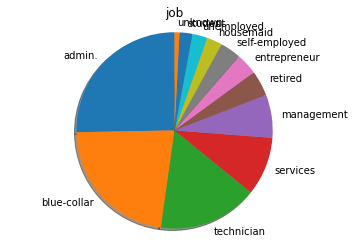

married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64
Total: 41188
['married', 'single', 'divorced', 'unknown']
[24928, 11568, 4612, 80]
Title: marital


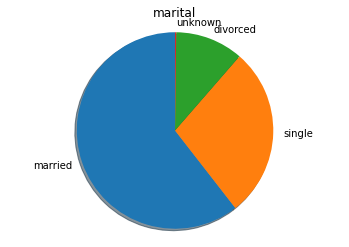

university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64
Total: 41188
['university.degree', 'high.school', 'basic.9y', 'professional.course', 'basic.4y', 'basic.6y', 'unknown', 'illiterate']
[12168, 9515, 6045, 5243, 4176, 2292, 1731, 18]
Title: education


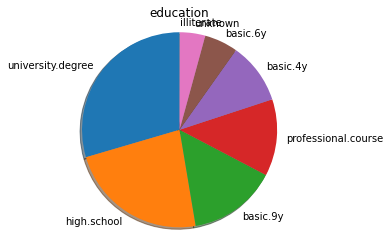

no         32588
unknown     8597
yes            3
Name: default, dtype: int64
Total: 41188
['no', 'unknown', 'yes']
[32588, 8597, 3]
Title: default


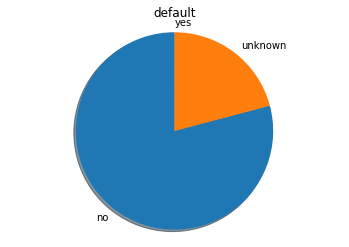

yes        21576
no         18622
unknown      990
Name: housing, dtype: int64
Total: 41188
['yes', 'no', 'unknown']
[21576, 18622, 990]
Title: housing


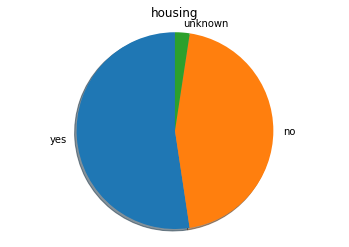

no         33950
yes         6248
unknown      990
Name: loan, dtype: int64
Total: 41188
['no', 'yes', 'unknown']
[33950, 6248, 990]
Title: loan


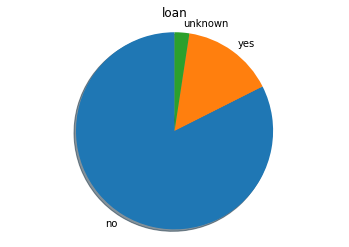

cellular     26144
telephone    15044
Name: contact, dtype: int64
Total: 41188
['cellular', 'telephone']
[26144, 15044]
Title: contact


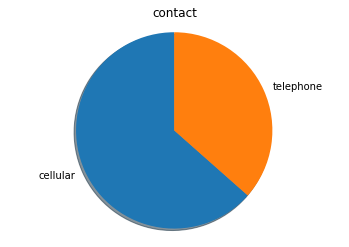

may    13769
jul     7174
aug     6178
jun     5318
nov     4101
apr     2632
oct      718
sep      570
mar      546
dec      182
Name: month, dtype: int64
Total: 41188
['may', 'jul', 'aug', 'jun', 'nov', 'apr', 'oct', 'sep', 'mar', 'dec']
[13769, 7174, 6178, 5318, 4101, 2632, 718, 570, 546, 182]
Title: month


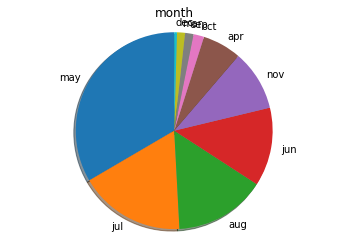

thu    8623
mon    8514
wed    8134
tue    8090
fri    7827
Name: day_of_week, dtype: int64
Total: 41188
['thu', 'mon', 'wed', 'tue', 'fri']
[8623, 8514, 8134, 8090, 7827]
Title: day_of_week


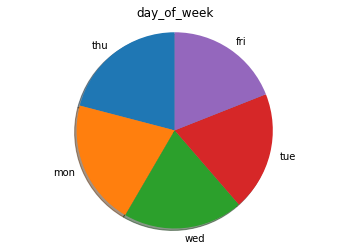

nonexistent    35563
failure         4252
success         1373
Name: poutcome, dtype: int64
Total: 41188
['nonexistent', 'failure', 'success']
[35563, 4252, 1373]
Title: poutcome


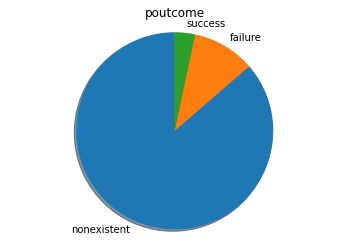

In [0]:
import matplotlib.pyplot as plt


def draw_proportion_of_categorical_data_for_each_column(categorical_df):
  categorical_column_names = list(categorical_df.columns)
  for column_name in categorical_column_names:
    categorical_counts = categorical_df.loc[:, column_name].value_counts()
    total = categorical_df.loc[:, column_name].count()
    draw_categorical_counts(categorical_counts, total, column_name)

def draw_categorical_counts(pd_series, total, title):
  print(pd_series)
  print('Total: ' + str(total))

  category = list(pd_series.index)
  print(category)
  size = list(pd_series.values)
  print(size)
  draw_pie_chart(category, size, title)

# label1 = [1, 2, 3, 4, 5]
# proportion1 = [10, 20, 30, 35, 5]

# label2 = [5, 4, 3, 2, 1]
# proportion2 = [10, 20, 30, 35, 5]


def draw_pie_chart(labels, size, title):
  fig1, ax1 = plt.subplots()
  
  ax1.pie(size, labels=labels, 
        shadow=True, startangle=90) #autopct='%1.1f%%',
  ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
  print('Title: ' + title)
  # plt.title=title
  ax1.set_title(title)
  plt.show()


draw_proportion_of_categorical_data_for_each_column(categorical_df)

In [0]:


import pandas as pd 
import numpy as np
# initialize list of lists 
data = [['tom', 10], ['nick', 15], ['juli', 14], [np.nan, 15], ['last',np.nan]] 
  
# Create the pandas DataFrame 
df = pd.DataFrame(data, columns = ['Name', 'Age'])
df.info()

print(df.count())